In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pyroSAR
from s1pro.s1_coh_proc import S1_coh_proc
from spatialist import Vector

In [4]:
# aoi = Vector('/data/aoi_bretagne.geojson')
infiles = ['/data/S1/S1A_IW_SLC__1SDV_20230826T180527_20230826T180554_050050_0605B2_E768.zip',
           '/data/S1/S1A_IW_SLC__1SDV_20230814T180526_20230814T180553_049875_05FFB4_7D92.zip']
aoi = '/data/aoi_bretagne.geojson'
# gpt_paras = ["-e", "-x", "-c","35G", "-q", "4", "-J-Xms25G", "-J-Xmx75G"]
# gpt_paras = ["-e", "-x", "-c", "4G", "-q", "6", "-J-Xms4G", "-J-Xmx10G", "-Dsnap.gpf.disableTileCache=true"]
# gpt_paras = ["-x", "-c", "8G", "-q", "6", "-J-Xms1G", "-J-Xmx10G"]
# gpt_paras = ["-x", "-c", "8027m", "-q", "6", "-J-Xmx11468m",  "-J-Xms2048m", "-J-XX:+AggressiveOpts", "-J-Xverify:none"]
gpt_paras = ["-x", "-c", "8027m", "-q", "8", "-J-Xmx20G",  "-J-Xms2048m", "-J-XX:+AggressiveOpts", "-J-Xverify:none"]
# S1_coh_proc(infiles, out_dir='/data/res', shapefile=aoi, pol='VV',tmpdir='/data/tmp', gpt_paras=gpt_paras)
# S1_coh_proc(infiles, out_dir='/data/res', shapefile=aoi, pol='VV',tmpdir='/data/tmp')
# S1_coh_proc(infiles, out_dir='/data/res', IWs=['IW3'], pol='VV',tmpdir='/data/tmp', gpt_paras=gpt_paras)
# S1_coh_proc(infiles, out_dir='/data/res', 
#             tmpdir='/data/tmp',
#             pol='VV',
#             IWs='IW1', 
#             gpt_paras=gpt_paras)
# info = pyroSAR.identify_many(infiles)
# for i in info:
    # print(i)

In [2]:
from pyroSAR.snap.auxil import execute, groupbyWorkers, gpt

# grp = groupbyWorkers('./TOPSAR Coreg Interferogram IW2 to GeoTiff.xml', n=1)
grp = groupbyWorkers('./experiment_from_snap_graph.xml', n=1)
# grp = groupbyWorkers('./Coh_tmp_prep_graph_dbg.xml', n=1)

gpt('./experiment_from_snap_graph.xml', groups=grp, tmpdir='/data/tmp/')
# gpt('./Coh_tmp_prep_graph_dbg.xml', groups=grp, tmpdir='/data/tmp/')
# execute('./Coh_tmp_prep_graph_dbg.xml', gpt_args=gpt_paras)
# execute('./experiment_from_snap_graph.xml', gpt_args=gpt_paras)

In [9]:
import rasterio as rio

# with rio.open('/data/tmp/S1_A_relOrb_103_COH__VV_20230826T180527_20230814T180526/S1_A_relOrb_103_COH__VV_20230826T180527_20230814T180526.tif') as ds:
with rio.open('/data/S1/test_ifg.tif') as ds:
# with rio.open('/data/tmp/S1_relOrb_TEST_split_before_orbit.tif') as ds:
    print(ds.profile)
    img = ds.read(3)
    re = ds.read(1)
    im = ds.read(2)

/root/micromamba/envs/s1_proc/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 26057, 'height': 2854, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.7771480071093748e-05, 0.0, 0.0,
       0.0, -0.00012948512710408977, 0.0), 'blockysize': 2854, 'tiled': False, 'interleave': 'band'}


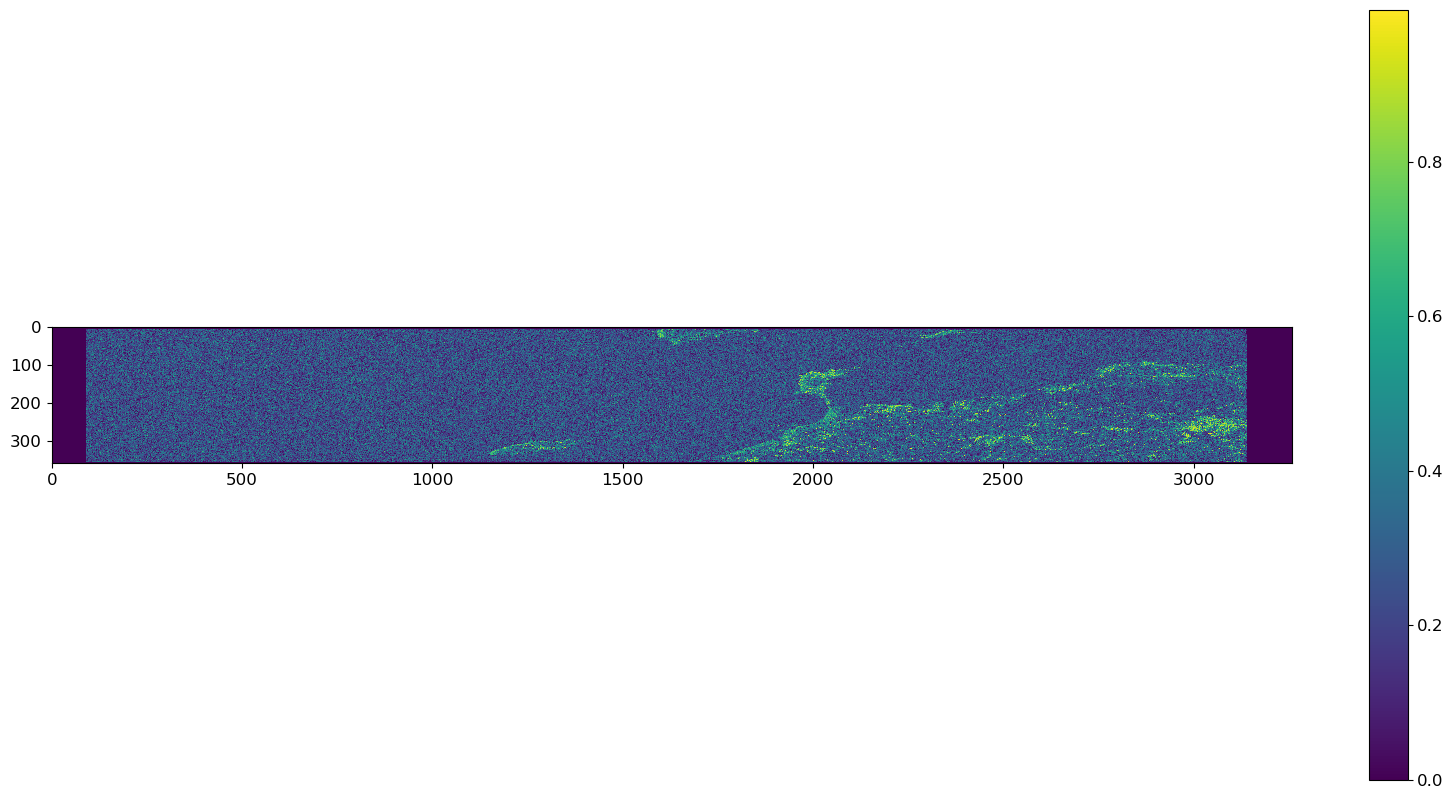

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(img[::8,::8], interpolation='nearest')#, vmin=0, vmax=100000)
plt.colorbar()

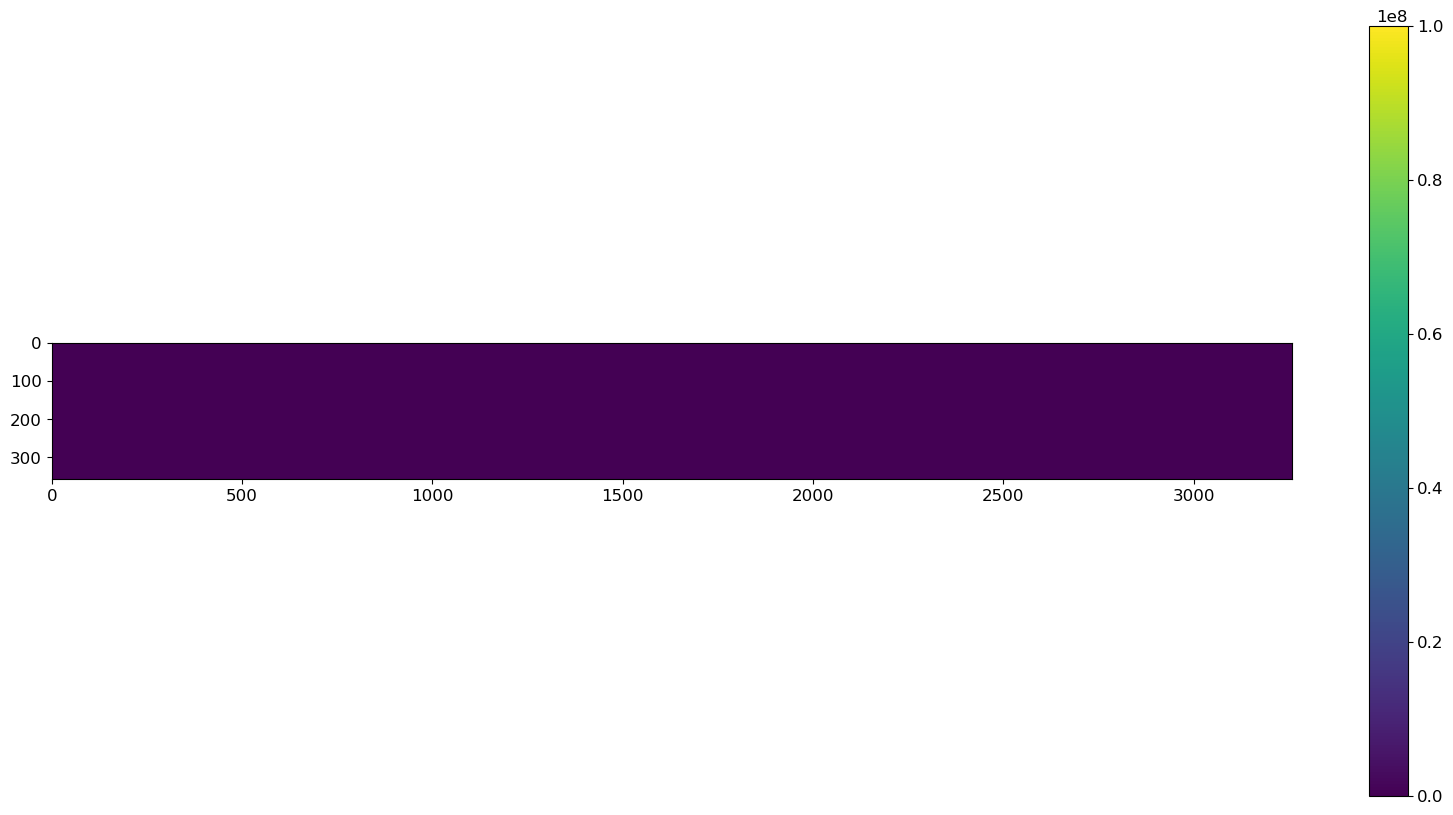

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(np.angle(re+1j*im)[::8, ::8], interpolation='nearest', vmin=0, vmax=100000000)
plt.colorbar()

(array([7.43643e+05, 1.90000e+01, 4.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.      ,  201355.703125,  402711.40625 ,  604067.125   ,
         805422.8125  , 1006778.5     , 1208134.25    , 1409489.875   ,
        1610845.625   , 1812201.25    , 2013557.      ]),
 <BarContainer object of 10 artists>)

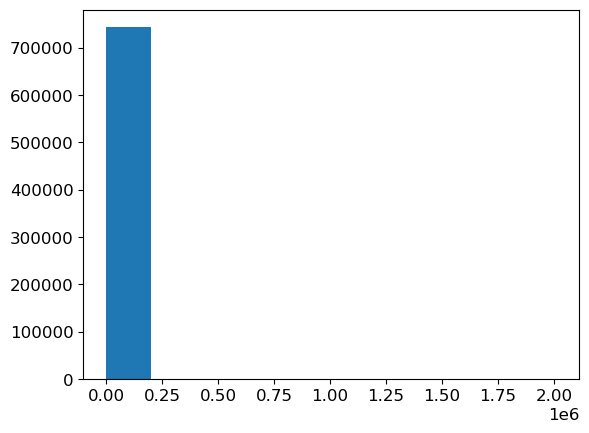

In [12]:
plt.hist(img.ravel()[::100])